In [9]:
import tensorflow as tf

mnist=tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 6s 97us/step - loss: 0.2674 - acc: 0.9222
Epoch 2/3
60000/60000 [==============================] - 5s 77us/step - loss: 0.1083 - acc: 0.9666
Epoch 3/3
60000/60000 [==============================] - 5s 76us/step - loss: 0.0734 - acc: 0.9773


In [10]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)
print(val_loss,val_accuracy)

10000/10000 [==============================] - 0s 41us/step
0.09307799269771204 0.9715


In [12]:
model.save('digit_reader.model')

In [13]:
new_model=tf.keras.models.load_model('digit_reader.model')

In [15]:
predictions=new_model.predict([x_test])
print(predictions)

[[8.6504706e-09 6.3496469e-07 5.5803430e-06 ... 9.9998736e-01
  8.7755198e-10 1.3000212e-07]
 [2.2081263e-06 5.3224962e-02 9.4615614e-01 ... 1.9264222e-07
  5.4315188e-07 1.9910042e-10]
 [5.0941935e-08 9.9980575e-01 2.2900482e-05 ... 3.9759358e-05
  1.0879606e-04 1.7487453e-07]
 ...
 [4.8389790e-09 6.5647363e-08 5.0873592e-08 ... 1.3266394e-05
  1.9984725e-06 4.2444628e-04]
 [4.0822826e-05 4.0864816e-05 5.5240839e-06 ... 1.7266894e-06
  2.2129994e-03 4.3698577e-07]
 [8.8303775e-10 4.3011229e-07 9.8442037e-09 ... 1.1494780e-12
  1.1794949e-07 8.0513903e-12]]


In [19]:
import numpy as np

print(np.argmax(predictions[3]))
print(np.argmax(predictions[8]))

0
5


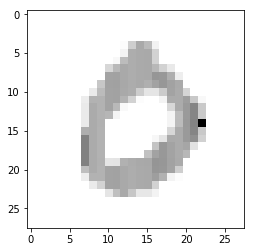

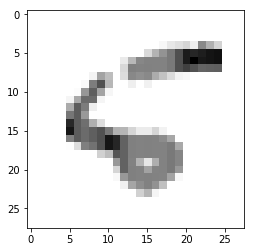

In [21]:
import matplotlib.pyplot as plt

plt.imshow(x_test[3], cmap=plt.cm.binary)
plt.show()
plt.imshow(x_test[8], cmap=plt.cm.binary)

plt.show()